In [1]:
pip install vaderSentiment-fr

Note: you may need to restart the kernel to use updated packages.


In [40]:
import pandas as pd
import numpy as np
from vaderSentiment_fr.vaderSentiment import SentimentIntensityAnalyzer
import re
import matplotlib.pyplot as plt
import datetime
import time
from matplotlib.dates import WeekdayLocator

In [2]:
df = pd.read_csv("Articles_Lemonde.csv")
df['Article_Title']

0        Ligue des champions : le FC Barcelone s’impose...
1        A Metz, Marine Le Pen accuse l’UE d’un « Tcher...
2        Foot féminin, golf et le dessinateur Siro, dan...
3        1er-Mai à Paris : les images d’une manifestati...
4        Quatre questions sur l’opération « Liberté » d...
                               ...                        
28625    Réforme de l’assurance-chômage : une nouvelle ...
28626    « Hamnet », de Maggie O’Farrell : le feuilleto...
28627    Le président LRM de la région Guadeloupe mis e...
28628    « Nous sommes à la fois capables du meilleur c...
28629    Des bureaux de légende : la France des « trent...
Name: Article_Title, Length: 28630, dtype: object

# neg = negative、neu = neutral、pos = positive、compound

In [3]:
SIA = SentimentIntensityAnalyzer()
for i in df['Article_Title']:
    vs = SIA.polarity_scores(i)
    print("{:-<65} {}".format(i, str(vs)))

Ligue des champions : le FC Barcelone s’impose face à Liverpool-- {'neg': 0.0, 'neu': 0.84, 'pos': 0.16, 'compound': 0.2942}
A Metz, Marine Le Pen accuse l’UE d’un « Tchernobyl économique, social et identitaire » {'neg': 0.136, 'neu': 0.864, 'pos': 0.0, 'compound': -0.3595}
Foot féminin, golf et le dessinateur Siro, dans "Esprit sport et olympisme" {'neg': 0.0, 'neu': 0.866, 'pos': 0.134, 'compound': 0.1779}
1er-Mai à Paris : les images d’une manifestation inhabituelle---- {'neg': 0.223, 'neu': 0.777, 'pos': 0.0, 'compound': -0.3182}
Quatre questions sur l’opération « Liberté » de Juan Guaido au Venezuela {'neg': 0.0, 'neu': 0.735, 'pos': 0.265, 'compound': 0.3818}
« J’ai bu pendant sept heures sur une scène de théâtre »--------- {'neg': 0.0, 'neu': 0.887, 'pos': 0.113, 'compound': 0.1027}
Après des fuites dans la presse sur Huawei, Theresa May limoge son ministre de la défense {'neg': 0.0, 'neu': 0.833, 'pos': 0.167, 'compound': 0.2023}
"Le Cagou" éligible au régime fiscal du mécénat.

Littérature : à Saint-Malo, une « nouvelle vague » venue d’Afrique {'neg': 0.224, 'neu': 0.776, 'pos': 0.0, 'compound': -0.1531}
La NASA veut ouvrir la Station spatiale internationale aux touristes dès 2020 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
La mort de Dr. John, un ambassadeur du bouillonnement musical de La Nouvelle-Orléans {'neg': 0.137, 'neu': 0.863, 'pos': 0.0, 'compound': -0.2263}
Les cétacés de Méditerranée contaminés par le plastique---------- {'neg': 0.3, 'neu': 0.7, 'pos': 0.0, 'compound': -0.4588}
Exposition : Jack Kirby, incroyable faiseur d’icônes------------- {'neg': 0.0, 'neu': 0.811, 'pos': 0.189, 'compound': 0.1027}
Architecture : réhabiliter, un pari vertueux--------------------- {'neg': 0.0, 'neu': 0.595, 'pos': 0.405, 'compound': 0.5267}
Architecture : à la Cité des électriciens, le patrimoine comme promesse d’avenir {'neg': 0.0, 'neu': 0.827, 'pos': 0.173, 'compound': 0.3182}
Exposition : le vinyle, un art plastique------------------------- {'neg'

Bourses, croissance : le calme avant la tempête------------------ {'neg': 0.0, 'neu': 0.536, 'pos': 0.464, 'compound': 0.6369}
« Ecologique, efficace et moins coûteux », Paris expérimente la déchèterie fluviale {'neg': 0.078, 'neu': 0.704, 'pos': 0.218, 'compound': 0.4576}
La vitalité de l’emploi américain écarte la perspective d’une baisse rapide des taux {'neg': 0.098, 'neu': 0.654, 'pos': 0.248, 'compound': 0.3182}
Le Wisconsin, « Normandie américaine » face à la crise du lait--- {'neg': 0.272, 'neu': 0.728, 'pos': 0.0, 'compound': -0.6249}
Haut-Karabakh : l’Etat français s’en prend aux chartes d’amitié-- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Les féminicides, un combat de société---------------------------- {'neg': 0.254, 'neu': 0.746, 'pos': 0.0, 'compound': -0.1779}
Des djihadistes français condamnés à mort en Irak mettent en cause Paris {'neg': 0.231, 'neu': 0.769, 'pos': 0.0, 'compound': -0.25}
Face à l’Europe et Matteo Salvini, les ONG de secours en mer continue

Henri Belolo, pionnier du disco et producteur des Village People, est mort {'neg': 0.147, 'neu': 0.853, 'pos': 0.0, 'compound': -0.2263}
Les phrases qui boitent------------------------------------------ {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
L’Italie adopte un décret antimigrants, avec des amendes records pour ceux qui leur viennent en aide {'neg': 0.0, 'neu': 0.8, 'pos': 0.2, 'compound': 0.3612}
Des voitures de location vandalisées en Espagne pour dénoncer le tourisme « qui tue la ville » {'neg': 0.315, 'neu': 0.685, 'pos': 0.0, 'compound': -0.7845}
Cette photo, partagée sur les réseaux sociaux, n’est pas celle d’un enfant tué par un migrant {'neg': 0.211, 'neu': 0.61, 'pos': 0.178, 'compound': -0.4019}
« Mon Erasmus en Finlande m’a réconcilié avec les études supérieures » {'neg': 0.0, 'neu': 0.759, 'pos': 0.241, 'compound': 0.5423}
« Les investissements dans l’agriculture africaine ne doivent pas profiter qu’aux multinationales » {'neg': 0.0, 'neu': 0.833, 'pos': 0.167

Une victime de violences et ses multiples « personnalités » ont témoigné devant la justice australienne {'neg': 0.108, 'neu': 0.718, 'pos': 0.174, 'compound': 0.3182}
La mode au défi de l’élégance radicale--------------------------- {'neg': 0.0, 'neu': 0.61, 'pos': 0.39, 'compound': 0.296}
Exclu pour une photo antisémite, un ex-membre du RN recyclé par l’extrême droite allemande {'neg': 0.156, 'neu': 0.844, 'pos': 0.0, 'compound': -0.4003}
Présidentielle américaine : Howard Schultz renonce à se présenter {'neg': 0.2, 'neu': 0.8, 'pos': 0.0, 'compound': -0.25}
Orange rétablit le signal de BFM-TV, RMC Découverte et RMC Story- {'neg': 0.0, 'neu': 0.82, 'pos': 0.18, 'compound': 0.4724}
Autour de l’expérience carcérale, Chris Kraus « Dans la fureur du monde » {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
« Hollywood 1982 » : un virage numérique dans l’histoire du cinéma {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Huit Etats américains ouvrent une enquête antitrust contre F

Terres agricoles, marchés, cantines… Montpellier veut se rapprocher de l’autonomie alimentaire {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Au Mozambique, neuf islamistes tués dans des combats avec l’armée {'neg': 0.424, 'neu': 0.576, 'pos': 0.0, 'compound': -0.7096}
Incendie à Rouen : Normandie Logistique n’a « jamais indiqué clairement » les quantités de produits qu’elle stockait {'neg': 0.117, 'neu': 0.883, 'pos': 0.0, 'compound': -0.3089}
Procédure de destitution : l’administration Trump empêche un témoin-clé de se présenter {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Le pire de la menace terroriste « est devant nous » ; histoire d’une citation vieille de quatre ans {'neg': 0.375, 'neu': 0.625, 'pos': 0.0, 'compound': -0.8625}
« Le Monde selon Amazon » : enquête sur l’ogre qui a changé la face du commerce mondial {'neg': 0.0, 'neu': 0.924, 'pos': 0.076, 'compound': 0.1027}
Série 1, le charme retrouvé de la berline------------------------ {'neg': 0.0, 'neu': 0.7, 

Elections britanniques : au Parti conservateur, des donations russes qui intriguent {'neg': 0.0, 'neu': 0.84, 'pos': 0.16, 'compound': 0.2263}
Top 14 : le Racing 92 respire, le Stade Français s’enfonce------- {'neg': 0.0, 'neu': 0.877, 'pos': 0.123, 'compound': 0.2462}
Troisième titre européen de cyclo-cross consécutif pour Mathieu van der Poel {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
La gauche presque au complet à la manifestation contre l’islamophobie {'neg': 0.204, 'neu': 0.796, 'pos': 0.0, 'compound': -0.3182}
La pintade vulturine fait entrer les oiseaux dans la complexité sociale {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Une grosse anthologie sur la mode, des clichés intimes, des saveurs de Turquie… Les 7 idées de la semaine {'neg': 0.0, 'neu': 0.837, 'pos': 0.163, 'compound': 0.3182}
Esope, Borges, Autin-Grenier : la chronique « poches » de Mathias Enard {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Ligue 2 : le stade de Troyes fermé jusqu’à nouve

Affaire Elodie Kulik : Willy Bardon « en phase de sortie progressive du coma » {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Grève contre la réforme des retraites : 30 % d’activité en moins jeudi, selon les commerçants {'neg': 0.102, 'neu': 0.898, 'pos': 0.0, 'compound': -0.2481}
Téléthon et expérimentation sur les animaux : le vrai du faux---- {'neg': 0.126, 'neu': 0.756, 'pos': 0.118, 'compound': -0.0258}
Les preuves de l’ingérence russe dans la campagne de Macron en 2017 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Mondial de handball : l’inquiétante élimination des Bleues, à huit mois des JO {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Sur la réforme des retraites, Philippe est en première ligne pendant que Macron reste muet {'neg': 0.0, 'neu': 0.909, 'pos': 0.091, 'compound': 0.1027}
Les meilleurs kits Lego pour les enfants------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Les Comores veulent croire à l’émergence pour 2030----

A Tokyo, Taipei, Bucarest… les films de la semaine très à l’Est-- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
La France va créer une « maison du dessin de presse et du dessin satirique » {'neg': 0.0, 'neu': 0.877, 'pos': 0.123, 'compound': 0.2732}
Carole Ghosn, une épouse « discrète », « forte » et première avocate de son mari {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Un hiver de grèves, ou l’expérience du « temps suspendu »-------- {'neg': 0.328, 'neu': 0.672, 'pos': 0.0, 'compound': -0.5267}
Le recours aux pesticides a connu une hausse spectaculaire en 2018 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Jacques Dessange, ancien « coiffeur des stars », est décédé------ {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Gaëtan Roussel : « Le vin est un compagnon de musique et de studio » {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
« En Libye, les kadhafistes pensent que l’alliance avec Haftar leur permettra de revenir au pouvoir » {'neg': 0.0, 

« Contes d’hiver » au Mandapa : Ralph Nataf fait revivre Victor derrière la légende de Hugo {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Tempête Ciara : 35 départements du nord de la France placés en vigilance orange {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Il est comme ça… Luca de Meo------------------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Le militaire qui a tué au moins vingt-neuf personnes en Thaïlande a été « abattu » {'neg': 0.307, 'neu': 0.693, 'pos': 0.0, 'compound': -0.7351}
Ski : Clément Noël s’impose à Chamonix, Pinturault gâche une occasion {'neg': 0.232, 'neu': 0.652, 'pos': 0.116, 'compound': -0.3818}
A la rencontre des amis de Michou-------------------------------- {'neg': 0.0, 'neu': 0.659, 'pos': 0.341, 'compound': 0.4767}
Merkel congédie un membre de son gouvernement jugé trop proche de l’extrême-droite {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
« Les Etats du Sahel risquent l’effondrement », prévient 

Avec son « Odyssée » revisitée, la Cour des Contes humanise avec brio Ulysse, le héros homérien {'neg': 0.0, 'neu': 0.816, 'pos': 0.184, 'compound': 0.5574}
Coronavirus : comment mettre ses méninges, ou son PC, au service de la recherche {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Coronavirus : 1, 2 et 3... que veulent dire les différents stades de l’épidémie ? {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': -0.0271}
#VraieFemmeAfricaine, le hashtag qui renverse les clichés sexistes {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Le point sur l’épidémie due au coronavirus dans le monde : 41 nouveaux morts en Italie, troisième pays le plus touché {'neg': 0.153, 'neu': 0.786, 'pos': 0.061, 'compound': -0.3382}
Le groupe Hachette renonce à publier les mémoires de Woody Allen- {'neg': 0.167, 'neu': 0.833, 'pos': 0.0, 'compound': -0.25}
737 MAX : les pratiques de Boeing mises en cause par le Congrès-- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
« Disparitions » : 

« Sine die » : la chronique du confinement d’Eric Chevillard. Jours 18 et 19 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Coronavirus : plus résilient, plus sobre, plus solidaire… des pistes pour imaginer « le monde d’après » {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Coronavirus : plus résilient, plus sobre, plus solidaire… des pistes pour imaginer « le monde d’après » {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Coronavirus : au Royaume-Uni, des antennes 5G incendiées à cause d’une théorie du complot {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Le chanteur espagnol Luis Eduardo Aute est mort------------------ {'neg': 0.213, 'neu': 0.787, 'pos': 0.0, 'compound': -0.2263}
« J’ai peur d’être enfermé là-bas, y a trop de cas » : scènes de la justice ordinaire sous coronavirus {'neg': 0.065, 'neu': 0.736, 'pos': 0.199, 'compound': 0.4767}
Etats-Unis : démission du secrétaire à l’US Navy----------------- {'neg': 0.239, 'neu': 0.761, 'pos': 0.0, 'compoun

« Les fumeurs sont désespérés » : en Argentine, le coronavirus entraîne une pénurie de cigarettes {'neg': 0.326, 'neu': 0.674, 'pos': 0.0, 'compound': -0.6486}
Pour échapper à la peste de 1665, « 250 000 personnes – soit la moitié de la population – quittent Londres précipitamment » {'neg': 0.0, 'neu': 0.928, 'pos': 0.072, 'compound': 0.3147}
Journal d’un parent confiné, semaine VIII : le crash du père hélicoptère {'neg': 0.197, 'neu': 0.803, 'pos': 0.0, 'compound': -0.4019}
Sexe & confinement : le feu d’artifice annoncé n’a pas eu lieu--- {'neg': 0.179, 'neu': 0.821, 'pos': 0.0, 'compound': -0.34}
Cinq forêts pour un premier bol d’air et de vert----------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Dix-huit départements placés en vigilance orange, fortes pluies attendues dimanche {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
« Notre véritable 6e sens » : à la recherche de l’indispensable équilibre {'neg': 0.0, 'neu': 0.759, 'pos': 0.241, 'compound': 0.5859}
Er

Libye : opération militaire pour reprendre Syrte, appel au cessez-le-feu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Pétrole : l’OPEP et la Russie prolongent d’un mois leur baisse de production historique {'neg': 0.103, 'neu': 0.897, 'pos': 0.0, 'compound': -0.2003}
Auguste Escoffier, génie des fourneaux et inventeur du restaurant moderne {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Des enfants « malades de l’école »------------------------------- {'neg': 0.241, 'neu': 0.759, 'pos': 0.0, 'compound': -0.2263}
Attaque meurtrière dans un village du centre du Mali------------- {'neg': 0.273, 'neu': 0.727, 'pos': 0.0, 'compound': -0.4588}
Le polo, de René Lacoste aux contre-cultures--------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Dominique Costagliola : « Durant la crise du Covid-19, certains chercheurs ont choisi de malmener la science » {'neg': 0.188, 'neu': 0.734, 'pos': 0.078, 'compound': -0.5267}
La santé retrouvée du thon rouge ne profite 

« Les Cormorans », d’Edouard Jousselin : les monstres du Pacifique Sud {'neg': 0.0, 'neu': 0.803, 'pos': 0.197, 'compound': 0.4019}
En Algérie, la justice libère Karim Tabbou, Amira Bouraoui, Samir Benlarbi et Slimane Hamitouche, figures de la contestation {'neg': 0.0, 'neu': 0.724, 'pos': 0.276, 'compound': 0.7269}
L’opposante algérienne Amira Bouraoui remise en liberté provisoire {'neg': 0.0, 'neu': 0.761, 'pos': 0.239, 'compound': 0.296}
Le navire humanitaire « Ocean-Viking » se décrète en état d’urgence, avec 180 migrants à bord {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Air France annonce 7 580 suppressions de postes------------------ {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Avec Jean Castex comme premier ministre, Emmanuel Macron assume de vouloir gouverner seul {'neg': 0.109, 'neu': 0.797, 'pos': 0.094, 'compound': -0.0516}
Voile : 20 skippeurs au départ de la Vendée-Arctique, avec le Vendée Globe pour horizon {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compoun

« Quand le Covid-19 sera derrière nous, je crains qu’on oublie de nouveau les vieux » {'neg': 0.181, 'neu': 0.819, 'pos': 0.0, 'compound': -0.2732}
En facekini à Qingdao : c’est peut-être un détail pour vous…----- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
En cartes : comment le président turc, Recep Tayyip Erdogan, ravive le syndrome du traité de Sèvres {'neg': 0.0, 'neu': 0.86, 'pos': 0.14, 'compound': 0.3818}
Entre menaces d’interdiction et négociations, TikTok dans le flou aux Etats-Unis {'neg': 0.25, 'neu': 0.75, 'pos': 0.0, 'compound': -0.25}
A Khabarovsk, les manifestants continuent de défier Vladimir Poutine {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Trafic routier : les conditions de circulation s’améliorent en France après un samedi embouteillé {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Les meilleures cartes SD de 64 Go pour appareil photo------------ {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Le masque obligatoire lundi dans 69 com

Pour la justice des Pays-Bas, Geert Wilders a bel et bien insulté les Marocains, mais sans inciter à la haine {'neg': 0.207, 'neu': 0.544, 'pos': 0.249, 'compound': 0.0408}
La mort de l’anthropologue David Graeber------------------------- {'neg': 0.275, 'neu': 0.725, 'pos': 0.0, 'compound': -0.2263}
Tour de France 2020 : l’étrange bal des quarante-deux débutants-- {'neg': 0.135, 'neu': 0.865, 'pos': 0.0, 'compound': -0.1027}
En RDC, des miliciens armés sont entrés dans Bunia, le chef-lieu de l’Ituri {'neg': 0.167, 'neu': 0.833, 'pos': 0.0, 'compound': -0.4003}
Violence, réputation, blasphème… : au collège, l’éducation aux médias face au pouvoir des smartphones {'neg': 0.24, 'neu': 0.76, 'pos': 0.0, 'compound': -0.6249}
« Les gamins pètent un câble » : à Mayotte, une nouvelle flambée de violences urbaines {'neg': 0.074, 'neu': 0.926, 'pos': 0.0, 'compound': -0.0516}
Football : pas plus de 5 000 spectateurs pour le match Lens-PSG, s’il se joue {'neg': 0.0, 'neu': 0.854, 'pos': 0.146, 'co

La Cour de cassation confirme la remise de Félicien Kabuga à la justice internationale {'neg': 0.0, 'neu': 0.793, 'pos': 0.207, 'compound': 0.5267}
Covid-19 : comment les scientifiques jugent la stratégie sanitaire française {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Laïcité : comment Macron a imposé le séparatisme dans le débat--- {'neg': 0.099, 'neu': 0.901, 'pos': 0.0, 'compound': -0.0258}
Extrémistes, haine, propos radicaux… Pris en étau, les musulmans se cherchent une nouvelle « voix » {'neg': 0.205, 'neu': 0.795, 'pos': 0.0, 'compound': -0.3818}
Qui gouverne la Révolution ? Trois livres posent la question----- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Notre-Dame de Paris : la Cour des comptes attend plus de transparence sur l’usage des dons {'neg': 0.189, 'neu': 0.737, 'pos': 0.074, 'compound': -0.2575}
En Lituanie, Macron fustige la dépendance européenne aux équipements militaires américains {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Le chômage 

Au Canada, le soutien mesuré et ambigu de Justin Trudeau à la France {'neg': 0.0, 'neu': 0.876, 'pos': 0.124, 'compound': 0.1779}
Les meilleurs mini-amplis HiFi avec ou sans Bluetooth------------ {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
L’Occitanie, terre de feuilletons télévisés---------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Prince, Idles, Leyla McCalla... nos albums du moment------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': -0.0271}
Alexeï Rakcha, le démographe qui conteste les chiffres de mortalité du Covid-19 en Russie {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Tour de France 2021 : une double ascension du Mont Ventoux et deux contre-la-montre au programme {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
En Biélorussie, une manifestation dispersée près d’un lieu symbolique pour l’opposition {'neg': 0.187, 'neu': 0.813, 'pos': 0.0, 'compound': -0.3182}
Mort de Sean Connery, reconfinements en Europe, prêtre orthod

« Paroles de lecteurs  » - Les Américains sous le choc de la perte de leur suprématie mondiale {'neg': 0.22, 'neu': 0.673, 'pos': 0.108, 'compound': -0.5848}
« Maria Montessori, pionnière de l’éducation » : notre série en six épisodes {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
En Martinique, la naissance d’un rhum millésimé------------------ {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Le prix Renaudot décerné à Marie-Hélène Lafon pour « Histoire du fils » {'neg': 0.0, 'neu': 0.784, 'pos': 0.216, 'compound': 0.5106}
Le site d’e-commerce Wish ciblé par la répression des fraudes---- {'neg': 0.224, 'neu': 0.776, 'pos': 0.0, 'compound': -0.3818}
Vendée Globe : « Cette âme d’enfant, tout heureux devant sa coque de noix, toute pourrie, c’est elle qui me porte » {'neg': 0.199, 'neu': 0.616, 'pos': 0.185, 'compound': -0.1027}
Classe19, la solution numérique qui démocratise le soutien scolaire au Bénin {'neg': 0.0, 'neu': 0.692, 'pos': 0.308, 'compound': 0.4588}
La deuxième 

L’épave « Barca Nostra », œuvre phare de la Biennale 2019, toujours en rade à Venise {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Dans la capitale de l’Inde, la renaissance entravée d’Old Delhi-- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
La bibliothèque, miroir de notre intimité------------------------ {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
En France, la NBA déroule son show et son business--------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Masques usagés, attestations obsolètes, photos de confinement… Ils ont tout archivé {'neg': 0.18, 'neu': 0.82, 'pos': 0.0, 'compound': -0.296}
Olivier Royant, directeur de la rédaction de « Paris Match », est mort {'neg': 0.137, 'neu': 0.863, 'pos': 0.0, 'compound': -0.2263}
Le Royaume Uni est sorti définitivement du marché unique européen {'neg': 0.0, 'neu': 0.458, 'pos': 0.542, 'compound': 0.8074}
L’accord sur le Brexit n’est que le début de longues négociations avec le Royaume-Uni {'neg': 0.0,

Romain Kronenberg dans la simplicité formelle du photographe Robert Adams {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
L’écrivain Michel Le Bris est mort------------------------------- {'neg': 0.275, 'neu': 0.725, 'pos': 0.0, 'compound': -0.2263}
Remettre « L’Homme », d’Arnold Gehlen, au centre----------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
L’avenir du football français dans les mains de Vincent Labrune-- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Les banques européennes soumises à un nouveau test de résistance- {'neg': 0.304, 'neu': 0.696, 'pos': 0.0, 'compound': -0.3612}
« Pas de méga entrepôt, ni ici ni ailleurs » : Des centaines d’opposants à Amazon mobilisés en France {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Le tueur de Valence mis en examen pour « assassinats » dans l’enquête sur le double meurtre {'neg': 0.469, 'neu': 0.48, 'pos': 0.052, 'compound': -0.9231}
Pourquoi les prix de l’électricité et du gaz ont augmenté le 1er 

Temps d’écran : « Cessons de cultiver le scepticisme »----------- {'neg': 0.119, 'neu': 0.678, 'pos': 0.203, 'compound': 0.25}
Mali : à l’hôpital de Mopti, les chirurgiens tentent de sauver une génération estropiée {'neg': 0.0, 'neu': 0.802, 'pos': 0.198, 'compound': 0.4939}
L’homme qui voulait faire de Taïwan un pays viticole------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
La Commission européenne lance une enquête sur le remboursement des vols annulés pour cause de Covid-19 {'neg': 0.251, 'neu': 0.603, 'pos': 0.146, 'compound': -0.4767}
Un dépistage du Covid-19 toutes les quarante-huit heures : en Moselle, les travailleurs transfrontaliers exaspérés par une nouvelle restriction sanitaire {'neg': 0.264, 'neu': 0.736, 'pos': 0.0, 'compound': -0.6249}
Réforme de l’assurance-chômage : « Les demandeurs d’emploi concernés vont avoir un lourd sentiment d’injustice » {'neg': 0.212, 'neu': 0.707, 'pos': 0.082, 'compound': -0.34}
Les étudiants de l’Institut français de la mo

Angela Merkel en fin de règne, la lutte pour sa succession en Allemagne reste confuse {'neg': 0.207, 'neu': 0.69, 'pos': 0.103, 'compound': -0.2023}
Symbole de l’aide aux migrants en France, Cédric Herrou relaxé définitivement {'neg': 0.0, 'neu': 0.604, 'pos': 0.396, 'compound': 0.7096}
Mort de Patrick Juvet, interprète romantique et vedette du disco dans les années 1970 {'neg': 0.114, 'neu': 0.723, 'pos': 0.163, 'compound': 0.2714}
Moscou déplace des troupes et mène des exercices antidrones à la frontière ukrainienne {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Au Pérou, mort du « camarade Raul », numéro deux du Sentier lumineux {'neg': 0.137, 'neu': 0.863, 'pos': 0.0, 'compound': -0.2263}
Que valent les justifications d’Emmanuel Macron sur le choix de ne pas reconfiner la France dès janvier ? {'neg': 0.0, 'neu': 0.924, 'pos': 0.076, 'compound': 0.1027}
Danone : la suppression de près de 500 postes en France confirmée {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
« Hi

Yourcenar, Vian, Capote… Un test pour voyager dans la littérature du XXe siècle {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Art-thérapie : trois activités à l’œil sur Instagram------------- {'neg': 0.0, 'neu': 0.833, 'pos': 0.167, 'compound': 0.1027}
Comment les antivax font croire que Christian Estrosi a feint de se faire vacciner contre le Covid-19 {'neg': 0.0, 'neu': 0.829, 'pos': 0.171, 'compound': 0.5106}
Football : les clubs italiens participant à la Super Ligue seront exclus du championnat {'neg': 0.139, 'neu': 0.694, 'pos': 0.168, 'compound': 0.128}
A Téhéran, l’Irano-Britannique Nazanin Zaghari-Ratcliffe de nouveau condamnée {'neg': 0.277, 'neu': 0.723, 'pos': 0.0, 'compound': -0.0772}
Le parti pris militant de « Promising Young Woman »-------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
La Réunion : le président du département épinglé pour les recrutements de ses collaborateurs {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
« A rebours du mond

In [4]:
df['scores'] = df['Article_Title'].apply(lambda x: SIA.polarity_scores(x))
df

Unnamed: 0                                       Article_Date  \
0               0  Publié le 01 mai 2019 à 23h08 - Mis à jour le ...   
1               1  Publié le 01 mai 2019 à 22h06 - Mis à jour le ...   
2               2                      Publié le 01 mai 2019 à 22h00   
3               3                      Publié le 01 mai 2019 à 21h12   
4               4  Publié le 01 mai 2019 à 21h11 - Mis à jour le ...   
...           ...                                                ...   
28625       28779  Publié le 13 mai 2021 à 12h24 - Mis à jour le ...   
28626       28780                      Publié le 13 mai 2021 à 12h00   
28627       28781  Publié le 13 mai 2021 à 11h40 - Mis à jour le ...   
28628       28782  Publié le 13 mai 2021 à 11h00 - Mis à jour le ...   
28629       28783                                Par   Roxana Azimi    

                                           Article_Title  \
0      Ligue des champions : le FC Barcelone s’impose...   
1      A Metz, Marine Le Pen accuse l’UE d’un « Tcher...   
2      Foot féminin, golf et le dessinateur Siro, dan...   
3      1er-Mai à Paris : les images d’une manifestati...   
4      Quatre questions sur l’opération « Liberté » d...   
...                                                  ...   
28625  Réforme de l’assurance-chômage : une nouvelle ...   
28626  « Hamnet », de Maggie O’Farrell : le feuilleto...   
28627  Le président LRM de la région Guadeloupe mis e...   
28628  « Nous sommes à la fois capables du meilleur c...   
28629  Des bureaux de légende : la France des « trent...   

                                         Article_Summary  \
0          Lionel Messi a porté son équipe face aux R...   
1          Les sondages sont bons pour le Rassembleme...   
2                                         Pas de summary   
3        vidéo   Black blocs, gilets jaunes et masque...   
4          Des milliers de personnes étaient de nouve...   
...                                                  ...   
28625      Un projet de décret, qui vise à modifier l...   
28626  Notre feuilletoniste célèbre la puissance poét...   
28627      Les soupçons visant Ary Chalus concernent ...   
28628      Un courrier de Michel Mathieu, directeur g...   
28629  En imagesDans les années 1960 et 1970, six pho...   

                                                 Article  \
0      Et Lionel Messi porta l’estocade… Avec ses 599...   
1      Des dizaines de « On arrive » patientent sur l...   
2      "Esprit sport et olympisme", le journal de l'A...   
3      Quarante mille personnes ont manifesté à Paris...   
4      Que se passe-t-il au Venezuela ? Le pays a véc...   
...                                                  ...   
28625  Le gouvernement vient à nouveau de réécrire sa...   
28626  Peut-être le titre du nouveau roman de Maggie ...   
28627  Le président de la région Guadeloupe, Ary Chal...   
28628  Les salariés de la banque LCL ont reçu mardi 1...   
28629  C’est une scène d’anthologie du film Playtime ...   

                                             Article_url  \
0      https://www.lemonde.fr/football/article/2019/0...   
1      https://www.lemonde.fr/politique/article/2019/...   
2      https://www.lemonde.fr/mondephilatelique/artic...   
3      https://www.lemonde.fr/societe/video/2019/05/0...   
4      https://www.lemonde.fr/international/article/2...   
...                                                  ...   
28625  https://www.lemonde.fr/politique/article/2021/...   
28626  https://www.lemonde.fr/livres/article/2021/05/...   
28627  https://www.lemonde.fr/societe/article/2021/05...   
28628  https://www.lemonde.fr/economie/article/2021/0...   
28629  https://www.lemonde.fr/m-le-mag/article/2021/0...   

                                                  scores  
0      {'neg': 0.0, 'neu': 0.84, 'pos': 0.16, 'compou...  
1      {'neg': 0.136, 'neu': 0.864, 'pos': 0.0, 'comp...  
2      {'neg': 0.0, 'neu': 0.866, 'pos': 0.134, 'comp...  
3      {'neg': 0.223, 

In [5]:
df['compound'] = df['scores'].apply(lambda x: x['compound'])
df

Unnamed: 0                                       Article_Date  \
0               0  Publié le 01 mai 2019 à 23h08 - Mis à jour le ...   
1               1  Publié le 01 mai 2019 à 22h06 - Mis à jour le ...   
2               2                      Publié le 01 mai 2019 à 22h00   
3               3                      Publié le 01 mai 2019 à 21h12   
4               4  Publié le 01 mai 2019 à 21h11 - Mis à jour le ...   
...           ...                                                ...   
28625       28779  Publié le 13 mai 2021 à 12h24 - Mis à jour le ...   
28626       28780                      Publié le 13 mai 2021 à 12h00   
28627       28781  Publié le 13 mai 2021 à 11h40 - Mis à jour le ...   
28628       28782  Publié le 13 mai 2021 à 11h00 - Mis à jour le ...   
28629       28783                                Par   Roxana Azimi    

                                           Article_Title  \
0      Ligue des champions : le FC Barcelone s’impose...   
1      A Metz, Marine Le Pen accuse l’UE d’un « Tcher...   
2      Foot féminin, golf et le dessinateur Siro, dan...   
3      1er-Mai à Paris : les images d’une manifestati...   
4      Quatre questions sur l’opération « Liberté » d...   
...                                                  ...   
28625  Réforme de l’assurance-chômage : une nouvelle ...   
28626  « Hamnet », de Maggie O’Farrell : le feuilleto...   
28627  Le président LRM de la région Guadeloupe mis e...   
28628  « Nous sommes à la fois capables du meilleur c...   
28629  Des bureaux de légende : la France des « trent...   

                                         Article_Summary  \
0          Lionel Messi a porté son équipe face aux R...   
1          Les sondages sont bons pour le Rassembleme...   
2                                         Pas de summary   
3        vidéo   Black blocs, gilets jaunes et masque...   
4          Des milliers de personnes étaient de nouve...   
...                                                  ...   
28625      Un projet de décret, qui vise à modifier l...   
28626  Notre feuilletoniste célèbre la puissance poét...   
28627      Les soupçons visant Ary Chalus concernent ...   
28628      Un courrier de Michel Mathieu, directeur g...   
28629  En imagesDans les années 1960 et 1970, six pho...   

                                                 Article  \
0      Et Lionel Messi porta l’estocade… Avec ses 599...   
1      Des dizaines de « On arrive » patientent sur l...   
2      "Esprit sport et olympisme", le journal de l'A...   
3      Quarante mille personnes ont manifesté à Paris...   
4      Que se passe-t-il au Venezuela ? Le pays a véc...   
...                                                  ...   
28625  Le gouvernement vient à nouveau de réécrire sa...   
28626  Peut-être le titre du nouveau roman de Maggie ...   
28627  Le président de la région Guadeloupe, Ary Chal...   
28628  Les salariés de la banque LCL ont reçu mardi 1...   
28629  C’est une scène d’anthologie du film Playtime ...   

                                             Article_url  \
0      https://www.lemonde.fr/football/article/2019/0...   
1      https://www.lemonde.fr/politique/article/2019/...   
2      https://www.lemonde.fr/mondephilatelique/artic...   
3      https://www.lemonde.fr/societe/video/2019/05/0...   
4      https://www.lemonde.fr/international/article/2...   
...                                                  ...   
28625  https://www.lemonde.fr/politique/article/2021/...   
28626  https://www.lemonde.fr/livres/article/2021/05/...   
28627  https://www.lemonde.fr/societe/article/2021/05...   
28628  https://www.lemonde.fr/economie/article/2021/0...   
28629  https://www.lemonde.fr/m-le-mag/article/2021/0...   

                                                  scores  compound  
0      {'neg': 0.0, 'neu': 0.84, 'pos': 0.16, 'compou...    0.2942  
1      {'neg': 0.136, 'neu': 0.864, 'pos': 0.0, 'comp...   -0.3595  
2      {'neg': 0.0, 'neu': 0.866, 'pos': 0.134, 'co

# positive sentiment: compound score >= 0.05 
# neutral sentiment: (compound score > -0.05) and (compound score < 0.05) 
# negative sentiment: compound score <= -0.05

In [9]:
df['Sentiment'] = df['compound'].apply(lambda x: 'neutral' if -0.05<x<0.05 else 'positive' if x>=0.05 else 'negative')

<ipython-input-9-a9a6bc631f73>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sentiment'] = df['compound'].apply(lambda x: 'neutral' if -0.05<x<0.05 else 'positive' if x>=0.05 else 'negative')


In [10]:
df = df[df['Article_Date'].apply(lambda x: x.startswith('Publié'))==True]

In [11]:
df['new_date'] = df['Article_Date'].apply(lambda x: x[x.find('le')+3:x.find('-')] if x.find('-')==-1 else x[x.find('le')+3:x.find('à')-1])
df['new_date'] = df['new_date'].apply(lambda x: x[:x.find('à')-1] if x.find('à')!=-1 else x)


In [12]:
df['new_date'] = df['new_date'].apply(lambda x: x.replace(" ", ""))

In [13]:
df['new_date'] = df['new_date'].apply(lambda x:  
                     (x[:2] +'-01-'+x[-4:]) if x[2:-4]=='janvier' else 
                     (x[:2] +'-02-'+x[-4:]) if x[2:-4]=='février' else
                     (x[:2] +'-03-'+x[-4:]) if x[2:-4]=='mars' else
                     (x[:2] +'-04-'+x[-4:]) if x[2:-4]=='avril' else
                     (x[:2] +'-05-'+x[-4:]) if x[2:-4]=='mai' else
                     (x[:2] +'-06-'+x[-4:]) if x[2:-4]=='juin' else
                     (x[:2] +'-07-'+x[-4:]) if x[2:-4]=='juillet' else                 
                     (x[:2] +'-08-'+x[-4:]) if x[2:-4]=='août' else
                     (x[:2] +'-09-'+x[-4:]) if x[2:-4]=='septembre' else
                     (x[:2] +'-10-'+x[-4:]) if x[2:-4]=='octobre' else
                     (x[:2] +'-11-'+x[-4:]) if x[2:-4]=='novembre' else
                     (x[:2] +'-12-'+x[-4:]) if x[2:-4]=='décembre' else x)

In [14]:
#df['new_date'] = df['new_date'].apply(lambda x: x.replace(" ", ""))

In [15]:
#df['new_date'] = df['new_date'].apply(lambda x: re.sub(r"\b(?:[a-z])+",'',x))

In [16]:
df['new_date']= df['new_date'].apply(lambda x: x.split('-')[2]+'-'+x.split('-')[1]+'-'+x.split('-')[0])


In [17]:
df['Sentiment'].value_counts()

negative    10390
neutral      9804
positive     7260
Name: Sentiment, dtype: int64

In [18]:
df['Sentiment'].unique()

array(['positive', 'negative', 'neutral'], dtype=object)

In [19]:
df1 = df[['Unnamed: 0','new_date','Article_Title','Sentiment']]

df1.rename(columns={'Unnamed: 0':'id'},inplace = True)

/Users/mengxiangyong/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [20]:
df1

id    new_date                                      Article_Title  \
0          0  2019-05-01  Ligue des champions : le FC Barcelone s’impose...   
1          1  2019-05-01  A Metz, Marine Le Pen accuse l’UE d’un « Tcher...   
2          2  2019-05-01  Foot féminin, golf et le dessinateur Siro, dan...   
3          3  2019-05-01  1er-Mai à Paris : les images d’une manifestati...   
4          4  2019-05-01  Quatre questions sur l’opération « Liberté » d...   
...      ...         ...                                                ...   
28624  28778  2021-05-13  Covid-19 : les notices de 43 % des autotests c...   
28625  28779  2021-05-13  Réforme de l’assurance-chômage : une nouvelle ...   
28626  28780  2021-05-13  « Hamnet », de Maggie O’Farrell : le feuilleto...   
28627  28781  2021-05-13  Le président LRM de la région Guadeloupe mis e...   
28628  28782  2021-05-13  « Nous sommes à la fois capables du meilleur c...   

      Sentiment  
0      positive  
1      negative  
2      positive  
3      negative  
4      positive  
...         ...  
28624  negative  
28625  negative  
28626   neutral  
28627  positive  
28628  negative  

[27454 rows x 4 columns]

In [21]:
data = df1.groupby(['Sentiment'])
df_bar = data['Sentiment'].count()

df_bar_g = df_bar.reset_index(name='count')
df_bar_g

Sentiment  count
0  negative  10390
1   neutral   9804
2  positive   7260

Text(0.5, 1.0, 'Sentiment Analyse')

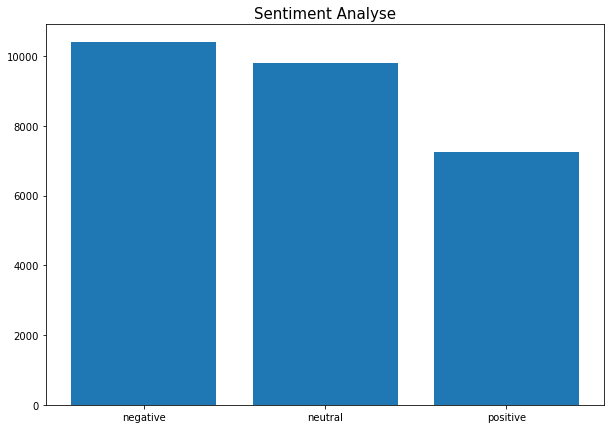

In [22]:
fig, ax = plt.subplots(figsize=(10, 7))
ax.bar(x=df_bar_g['Sentiment'],height=df_bar_g['count'])
ax.set_title("Sentiment Analyse", fontsize=15)

In [23]:
data = df1.groupby(['new_date','Sentiment'])
df_line = data['Sentiment'].count()
df_line_g = df_line.reset_index(name='count')
df_line_g

new_date Sentiment  count
0     2019-05-01  negative     11
1     2019-05-01   neutral     21
2     2019-05-01  positive      8
3     2019-05-02  negative     12
4     2019-05-02   neutral     16
...          ...       ...    ...
2227  2021-05-12   neutral     12
2228  2021-05-12  positive     10
2229  2021-05-13  negative     16
2230  2021-05-13   neutral     10
2231  2021-05-13  positive      9

[2232 rows x 3 columns]

In [37]:
print(df_line_g['new_date'].min())
print(df_line_g['new_date'].max())

2019-05-01
2021-05-13


In [24]:
df_neg = df_line_g[df_line_g['Sentiment']=='negative']
df_neu = df_line_g[df_line_g['Sentiment']=='neutral']
df_pos = df_line_g[df_line_g['Sentiment']=='positive']

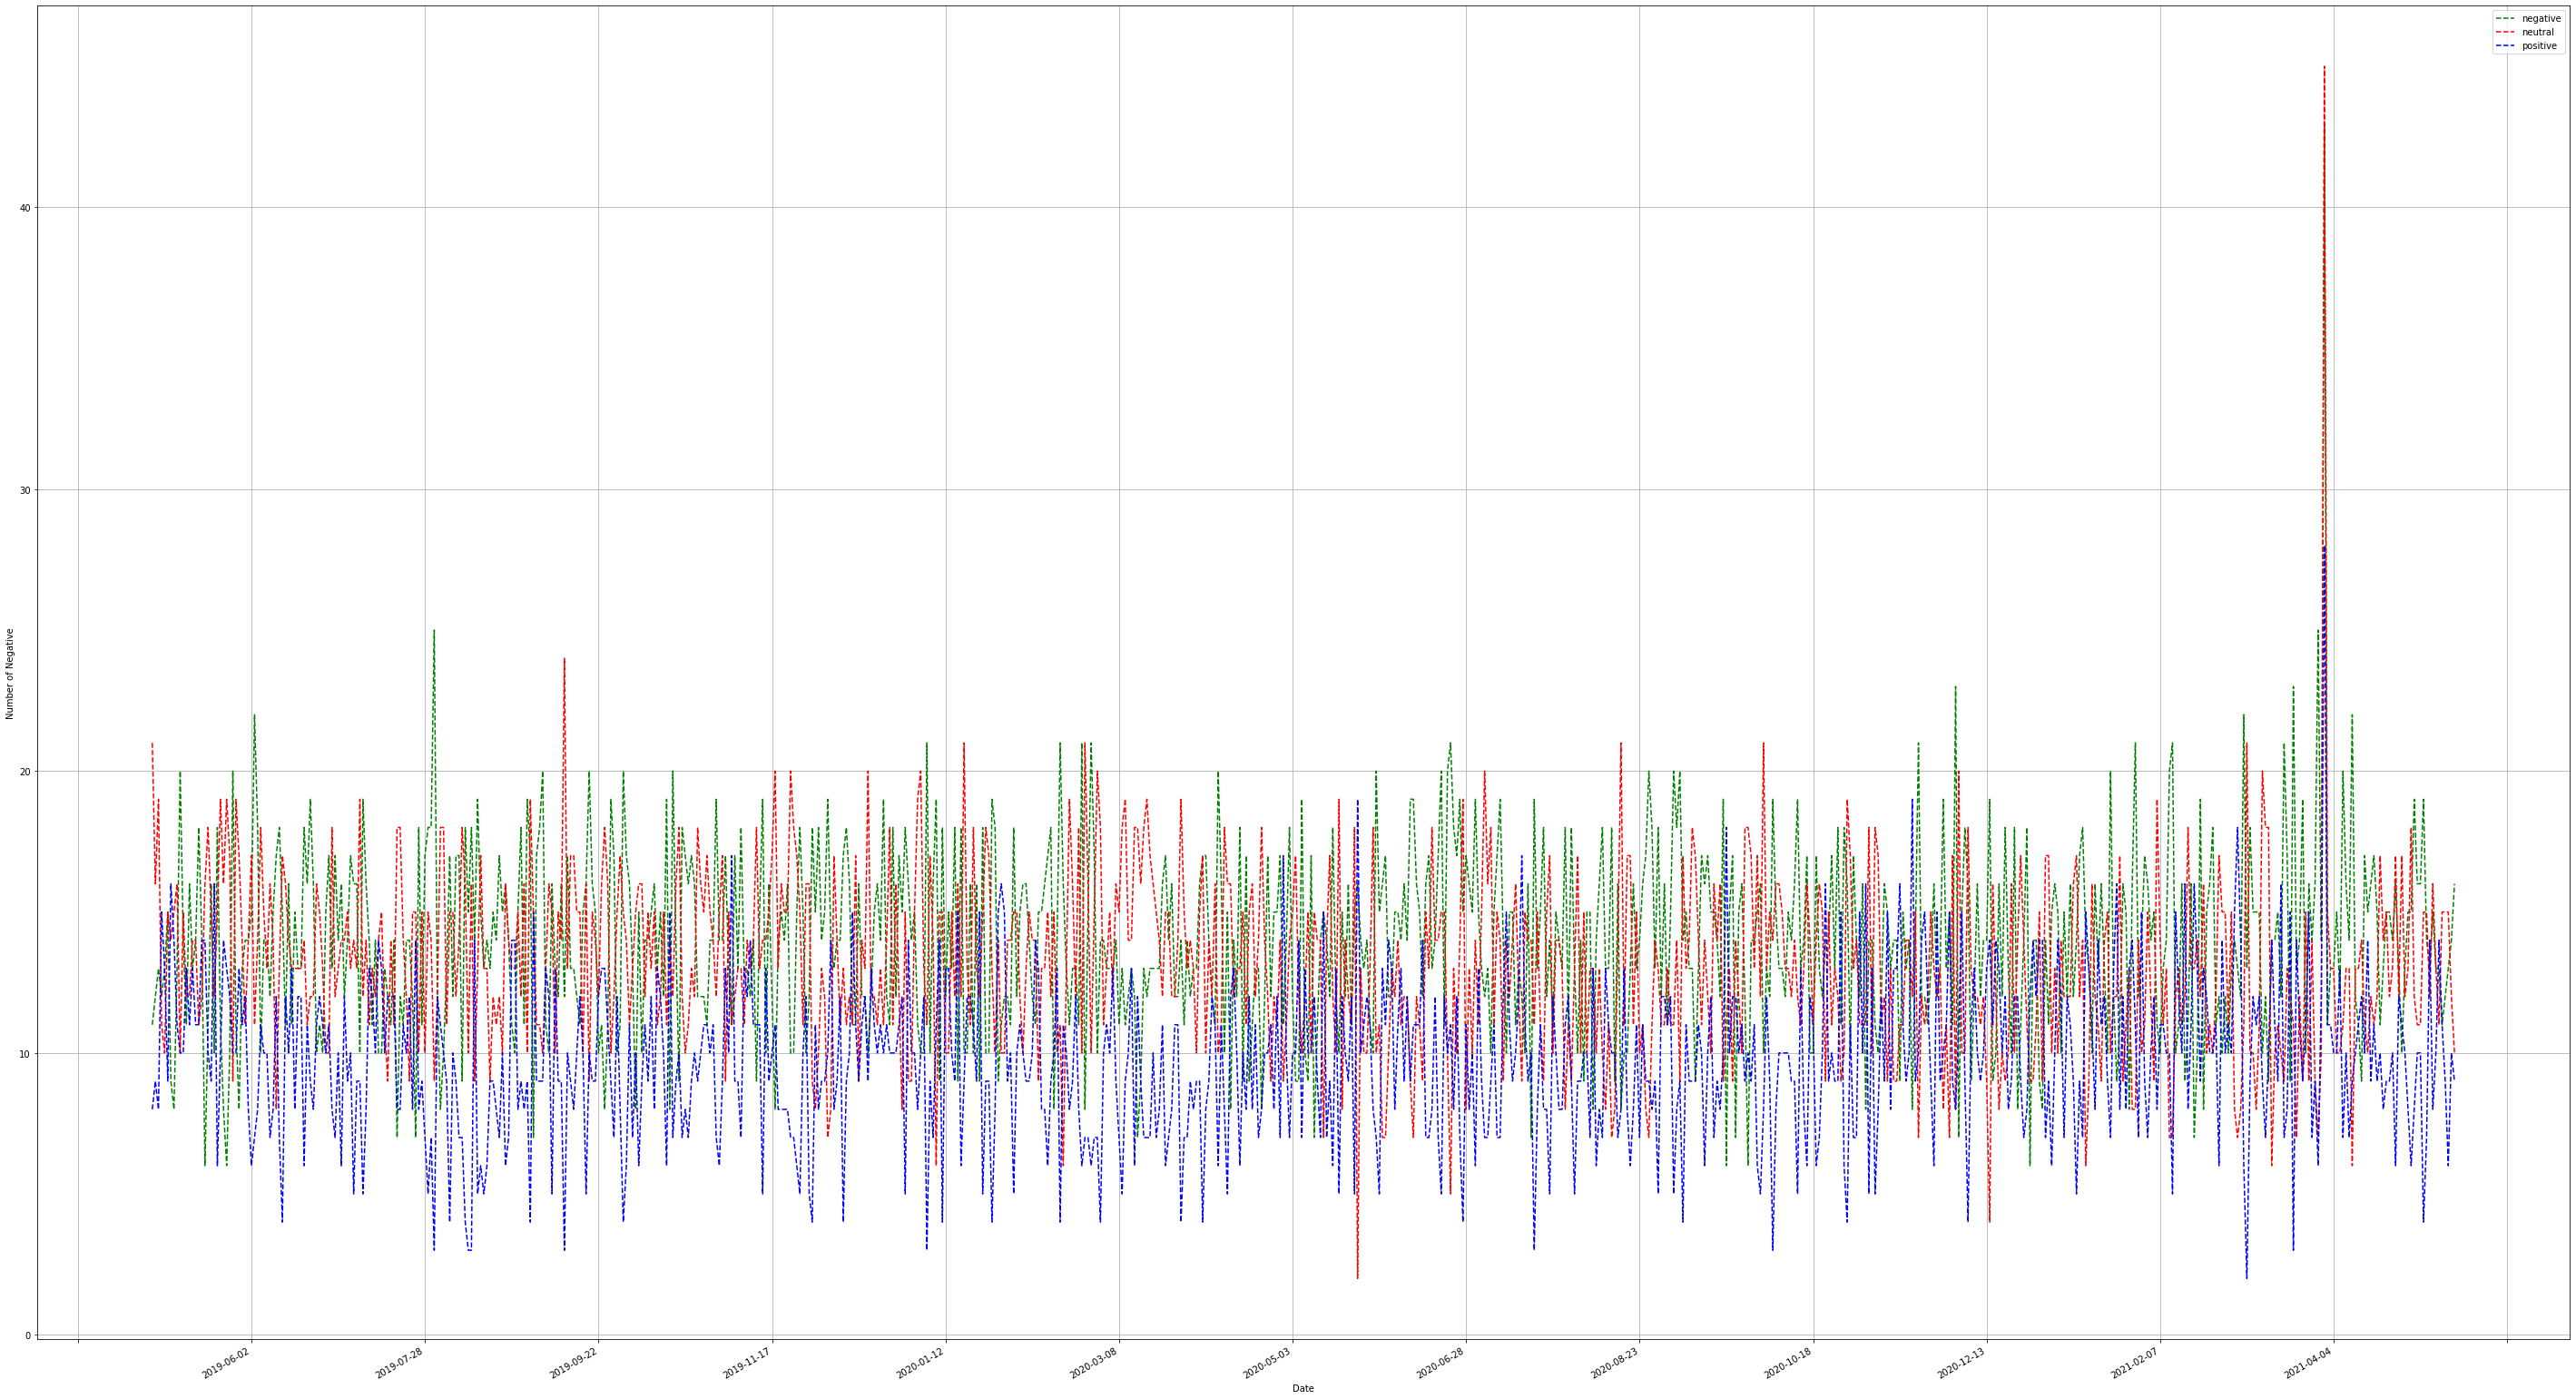

In [72]:
x=df_neg['new_date']
y1=df_neg['count']
y2=df_neu['count']
y3=df_pos['count']

fig, ax = plt.subplots(figsize=(50,30))


ax.plot_date(x, y1, fmt='g--',label='negative',color='g') # x = array of dates, y = array of numbers 
ax.plot_date(x, y2, fmt='g--',label='neutral',color='r') # x = array of dates, y = array of numbers  
ax.plot_date(x, y3, fmt='g--',label='positive',color='b') # x = array of dates, y = array of numbers  

fig.autofmt_xdate()

    # For tickmarks and ticklabels every fourth week
ax.xaxis.set_major_locator(WeekdayLocator(byweekday=(0), interval=8))



    # Grid for both major and minor ticks
plt.legend() 
plt.grid(True, which='both')
plt.xlabel('Date') #X轴标签
plt.ylabel("Number of Negative") #Y轴标签
plt.show()
fig.savefig('./sentimen.jpg')

TypeError: 'str' object cannot be interpreted as an integer

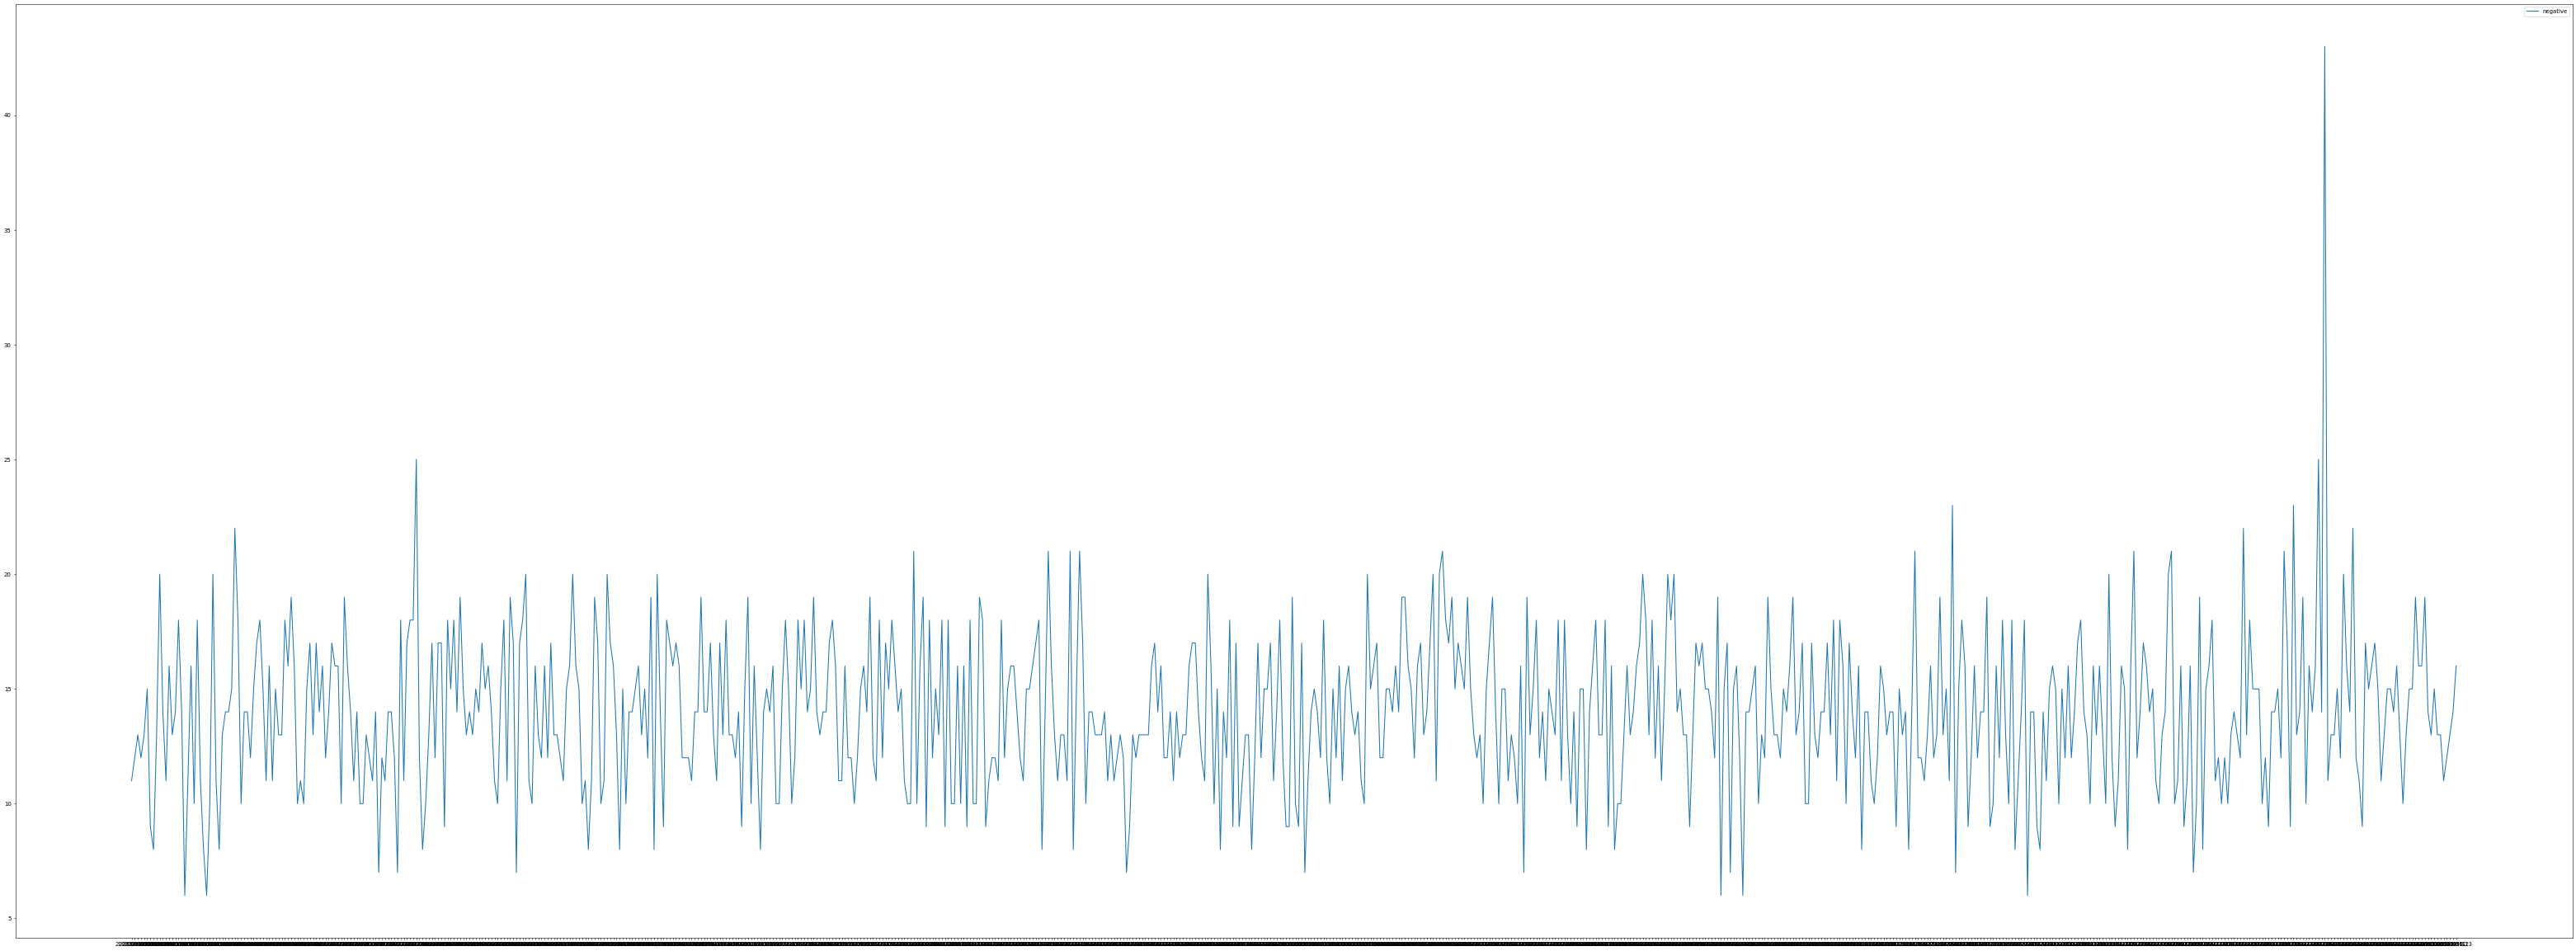

In [38]:
x=df_neg['new_date']
y1=df_neg['count']


plt.figure(figsize=(80,30),dpi=50)
plt.plot(x, y1, label='negative')

plt.legend()  
plt.xticks(range(df_line_g['new_date'].min(),df_line_g['new_date'].max(),30))
plt.xlabel('Date') #X轴标签
plt.ylabel("Number") #Y轴标签
plt.title("Sentiment Analyse by Date") #标题
plt.show()

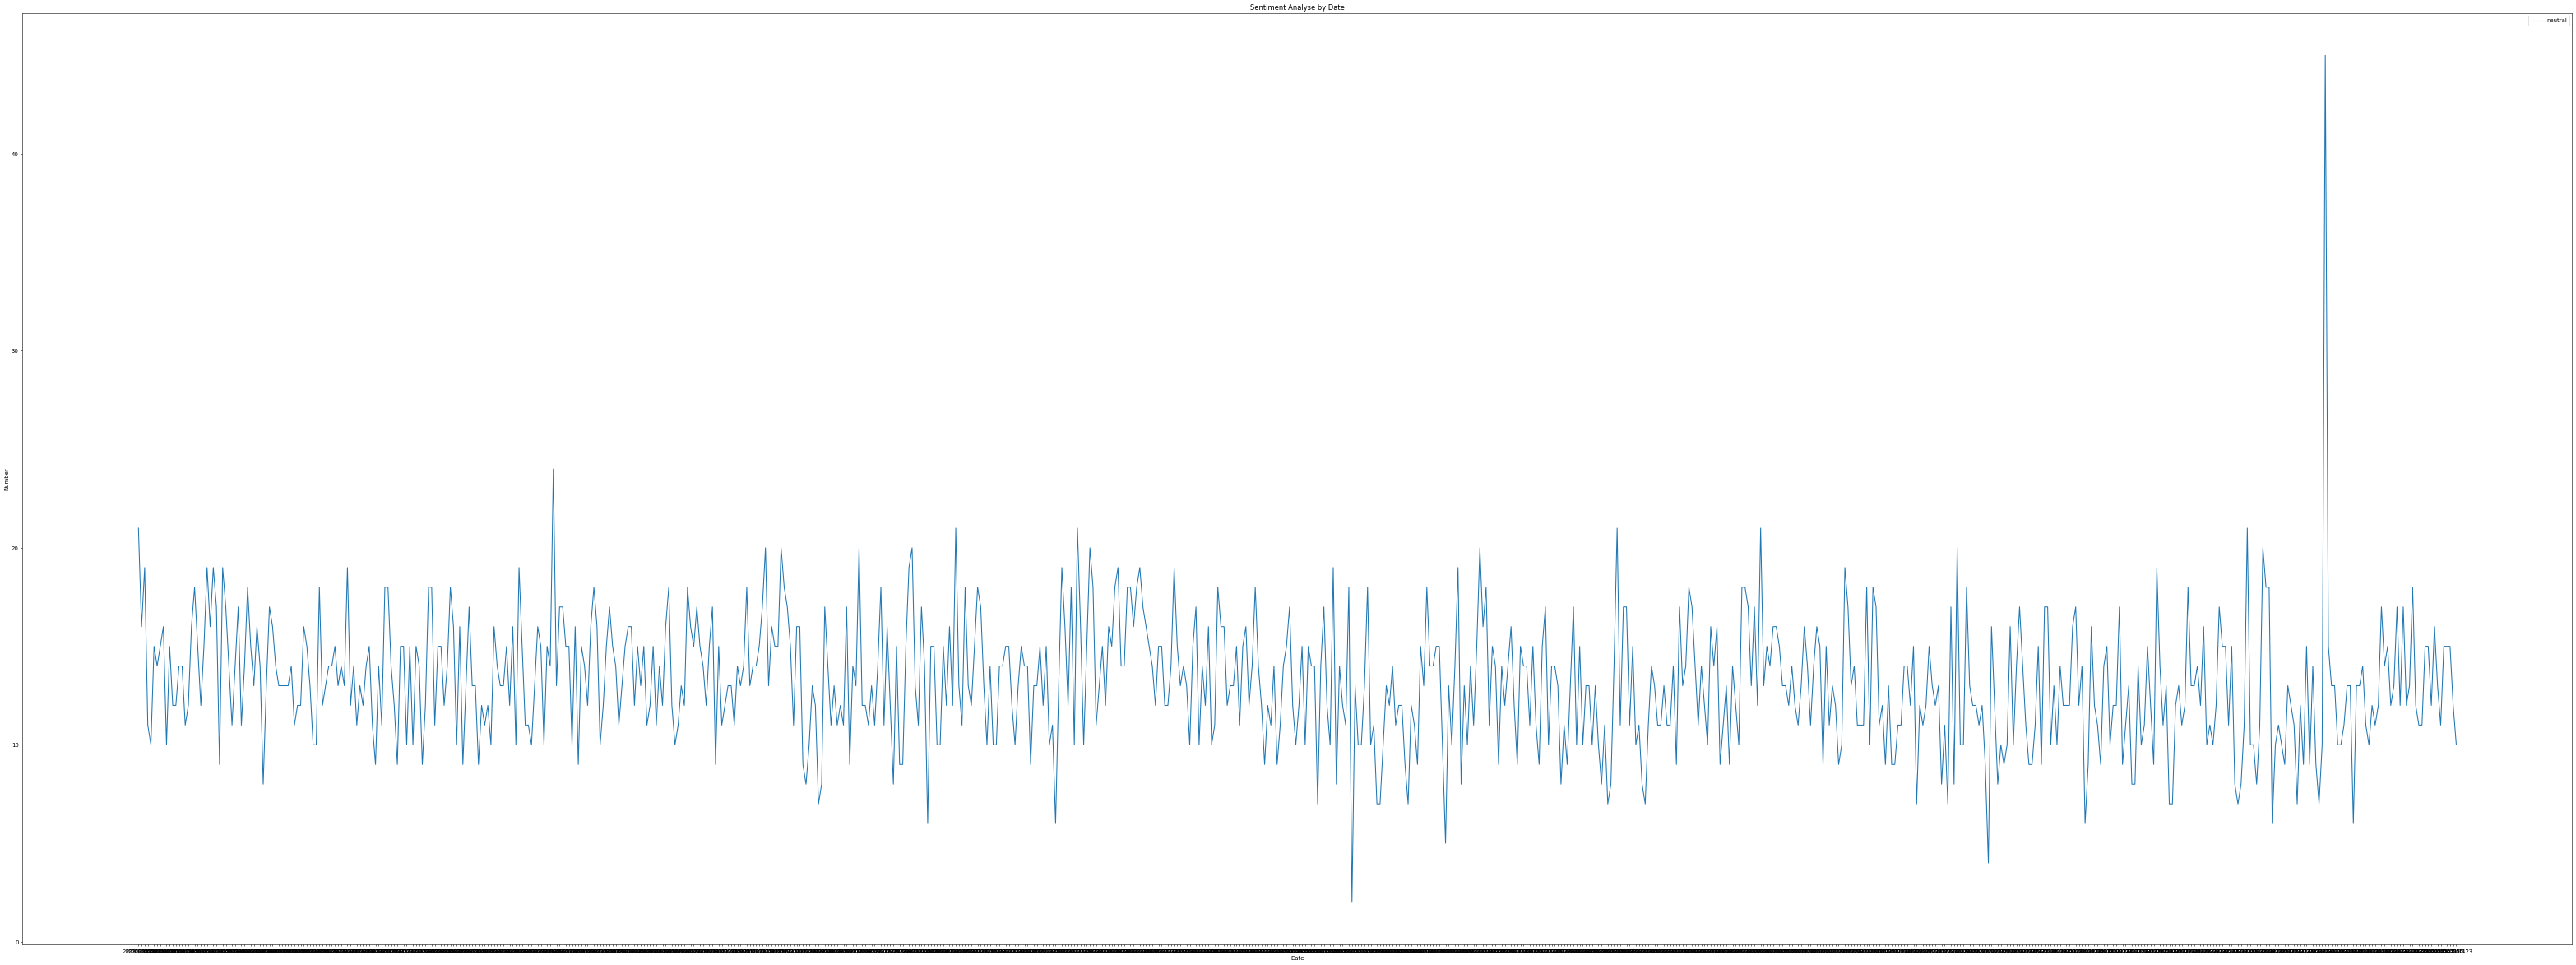

In [26]:
x=df_neg['new_date']

y2=df_neu['count']


plt.figure(figsize=(80,30),dpi=50)

plt.plot(x, y2, label='neutral')

plt.legend()  
plt.xlabel('Date') #X轴标签
plt.ylabel("Number") #Y轴标签
plt.title("Sentiment Analyse by Date") #标题
plt.show()

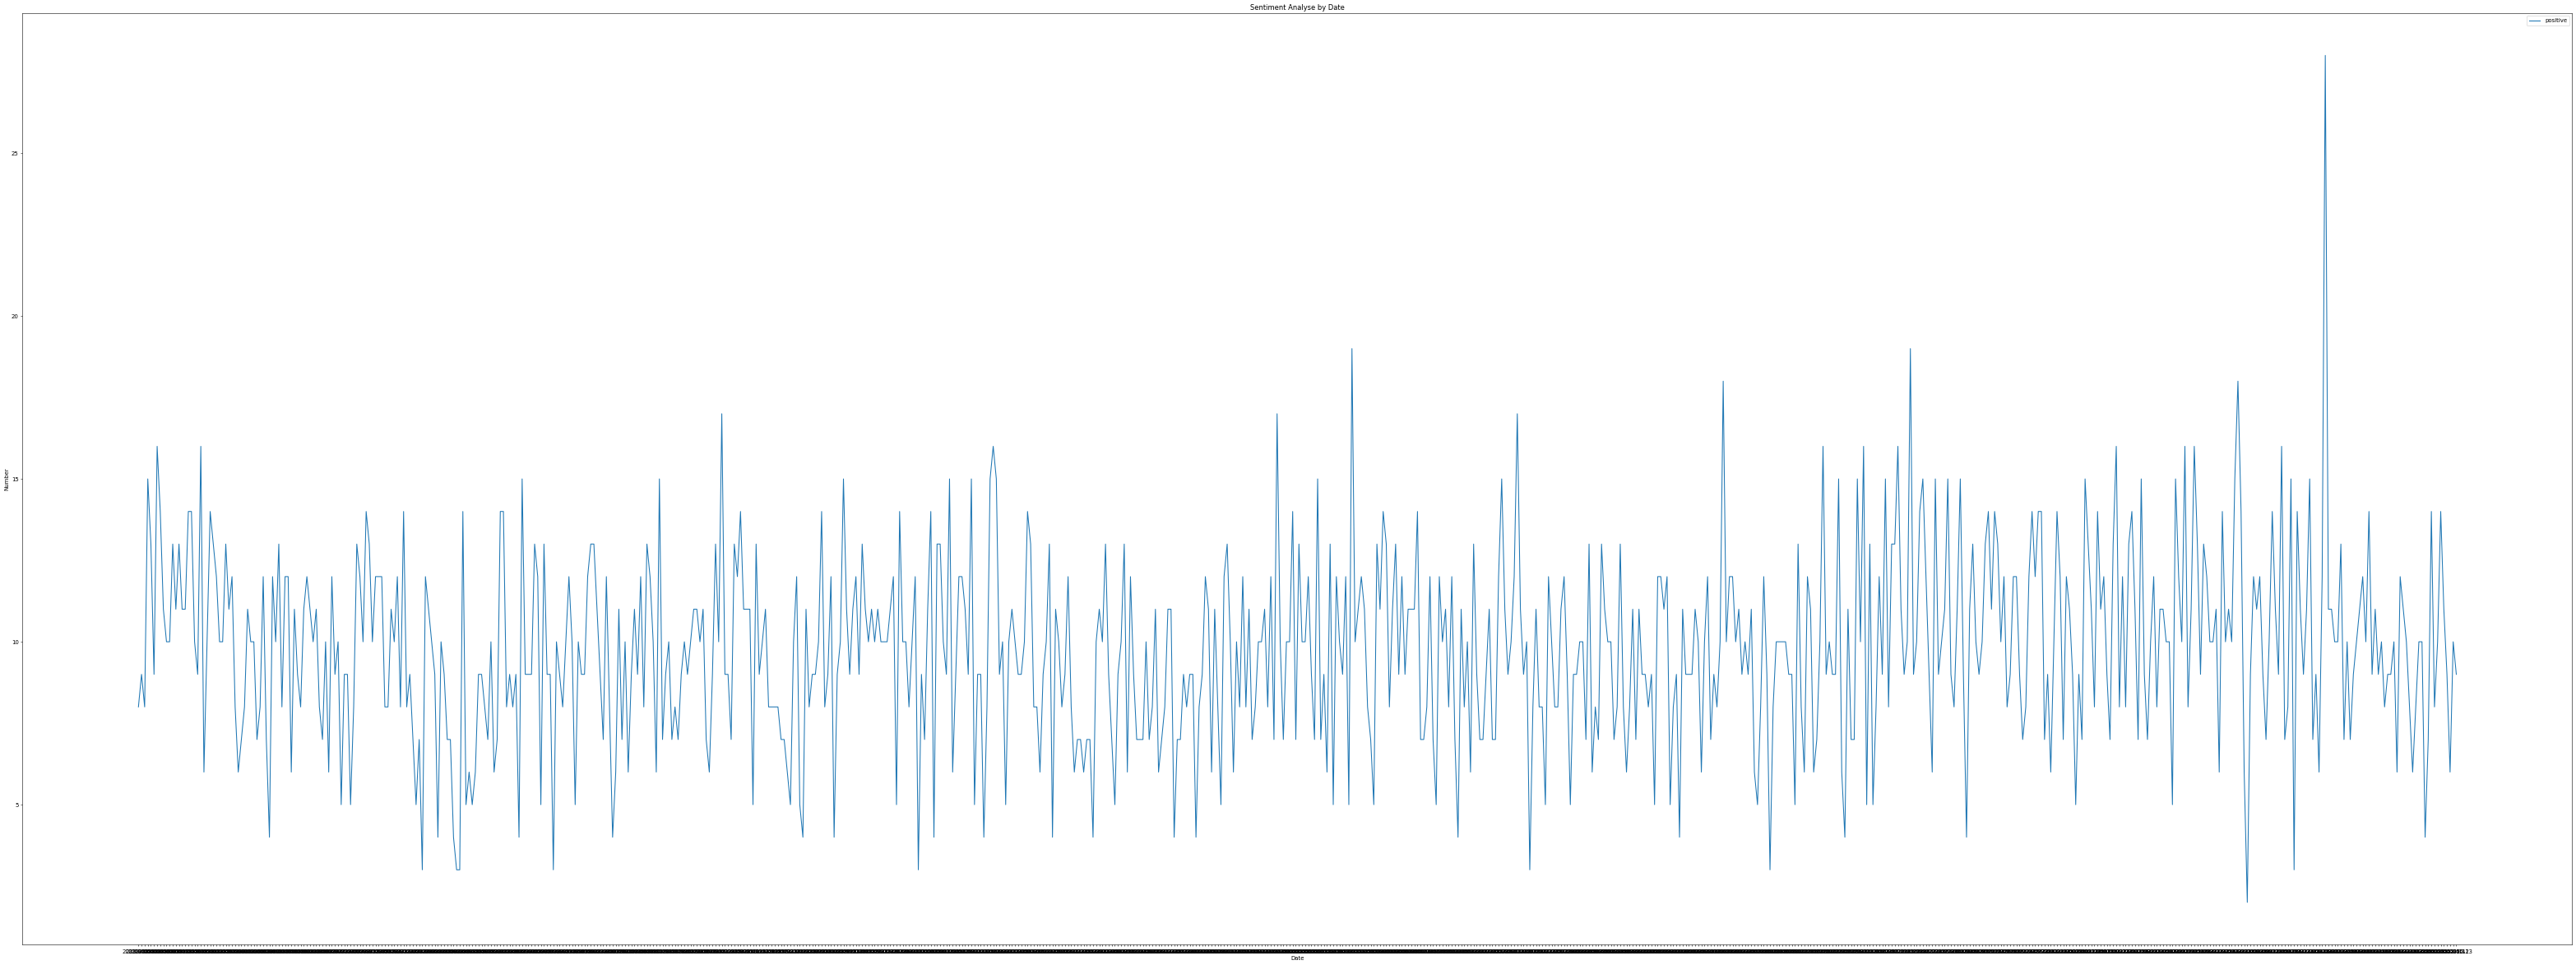

In [27]:
x=df_neg['new_date']

y3=df_pos['count']

plt.figure(figsize=(80,30),dpi=50)
plt.plot(x, y3, label='positive')
plt.legend()  
plt.xlabel('Date') #X轴标签
plt.ylabel("Number") #Y轴标签
plt.title("Sentiment Analyse by Date") #标题
plt.show()

In [17]:
#df1.to_csv("vader_v.csv", index_label="Unnamed: 0")